In [1]:
import os
import sys
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt 
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

In [2]:
label_file = "/Users/james/Documents/dataset/MIMIC-CXR/data_selection-241201.csv"
image_dir = "/Users/james/Documents/dataset/MIMIC-CXR/images_resized"

In [13]:
label = pd.read_csv(label_file)
print(label.iloc[0][:14].values.astype(int))

[0 0 0 0 0 0 0 0 1 0 0 0 0 0]


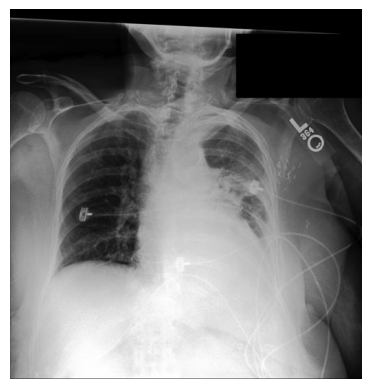

image size: (538, 512)


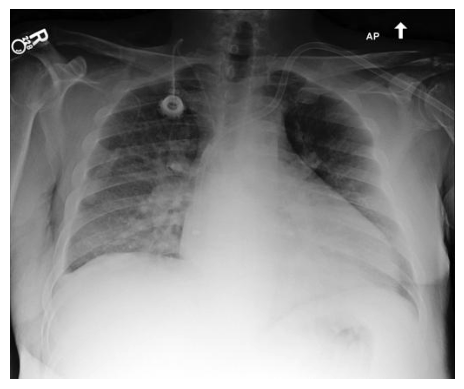

image size: (426, 512)


In [29]:
images_name = ["0a0a1d17-5fb4ffcc-a8ca1541-8c44d583-fd9c6388.jpg", "0a0aaa06-5627248b-12d3fa58-a853572b-167eb401.jpg"]
for image_name in images_name:
    image = Image.open(os.path.join(image_dir, image_name)).convert("L")
    plt.imshow(image, cmap="gray")
    plt.axis('off')
    plt.show()
    print(f'image size: {np.array(image).shape}')

In [16]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])


class CXRDataset(Dataset):
    def __init__(self, image_dir, label_file, transform=None):
        self.image_dir = image_dir
        self.labels_df = pd.read_csv(label_file)[:100]
        self.transform = transform

    def __len__(self):
        return len(self.labels_df)

    def __getitem__(self, idx):
        row = self.labels_df.iloc[idx]
        
        img_name = row['ImageID']
        labels = row.iloc[:14].values.astype(int)
        
        img_path = os.path.join(self.image_dir, img_name)
        image = Image.open(img_path).convert('RGB')
        
        if self.transform:
            image = self.transform(image)
        
        return image, torch.tensor(labels, dtype=torch.int64)

Images shape: torch.Size([16, 3, 224, 224])
Labels shape: torch.Size([16, 14])


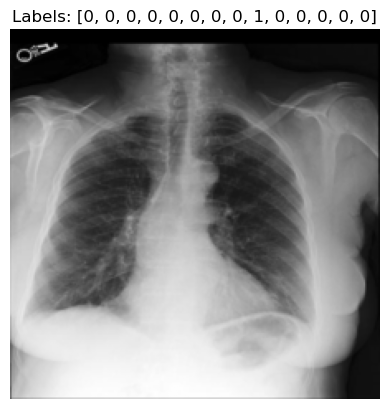

In [20]:
dataset = CXRDataset(image_dir=image_dir, label_file=label_file, transform=transform)

dataloader = DataLoader(dataset, batch_size=16, shuffle=True, num_workers=0)

for images, labels in dataloader:
    print(f"Images shape: {images.shape}")
    print(f"Labels shape: {labels.shape}")
    for i in range(len(images)):
        img = images[i].numpy().transpose((1, 2, 0))
        plt.imshow((img * 0.5 + 0.5))
        plt.title(f"Labels: {labels[i].tolist()}")
        plt.axis("off")
        plt.show()
        break
    break